I compared the ICRF3 S/X catalog with the ICRF1 catalog.

In [1]:
from astropy.table import Table, join, Column
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# My modules
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting
from my_progs.catalog.vsh_deg2_cor import vsh_deg02_fitting, residual_calc02
from my_progs.catalog.pos_diff import nor_sep, pos_diff_calc
from my_progs.catalog.pos_err import pos_err_calc
from my_progs.catalog.write_output import print_vsh1_corr, print_vsh2_corr
from my_progs.catalog.read_icrfn import read_icrf1, read_icrf3

In [2]:
# Read ICRF3 S/X catalog
icrf3sx = read_icrf3(wv="sx")
icrf3sx

<Table masked=True length=4536>
   icrf_name     iers_name type          ra         ... end_obs nb_sess nb_del
                                        deg         ...                       
     str16          str8   str1       float64       ... float64  int64  int64 
---------------- --------- ---- ------------------- ... ------- ------- ------
J000020.3-322101  2357-326   --       0.08499990025 ... 57776.0       4    237
J000027.0+030715  2357+028   -- 0.11259380737499998 ... 57974.7       1     28
J000053.0+405401  2358+406   -- 0.22117109666666665 ... 57809.9       3    152
J000105.3-155107  2358-161   -- 0.27220306162499996 ... 58137.6       4    316
J000107.0+605122  2358+605   --  0.2795825644583333 ... 57836.8       3    172
J000108.6+191433  2358+189   --  0.2859231923333333 ... 58205.8     168   3584
J000211.9-215309  2359-221   --  0.5499226089166666 ... 57901.9       3    103
J000315.9-194150  0000-199   --  0.8164558497083333 ... 58137.6       4    251
J000318.6-192722  0000-197   --  0.8278126181249998 ... 58137.6       5    296
             ...       ...  ...                 ... ...     ...     ...    ...
J235753.2-531113  2355-534    D  359.47194187566663 ... 58101.7     165   4895
J235809.8+492143  2355+490   --   359.5408896171249 ... 57840.3       2    174
J235810.8-102008  2355-106    D   359.5453433192499 ... 58204.3     768  24542
J235816.9-285334  2355-291   --   359.5707148113749 ... 57771.0       3    137
J235828.8+043024  2355+042   --  359.62019570283326 ... 57840.3       4    260
J235846.0+195520  2356+196   --   359.6920212854583 ... 57875.7       5    388
J235859.8+392228  2356+390   --   359.7493965439166 ... 57809.9       3    230
J235931.8-063943  2356-069   --     359.88256707925 ... 58048.6       5    195
J235933.1+385042  2356+385    D   359.8882533119583 ... 58204.3    1272  26649
J235935.4-313343  2357-318   --    359.897881414125 ... 58204.3     235   4692

In [3]:
# Read ICRF2 data
icrf1 = read_icrf1()

icrf1

<Table masked=True length=608>
   icrf_name     iers_name type         ra         ...  end_obs  nb_sess nb_del
                                       deg         ...                         
     str16          str8   str1      float64       ...  float64   int64  int64 
---------------- --------- ---- ------------------ ... --------- ------- ------
J000435.6-473619  0002-478    C 1.1485649833333333 ... 2449525.2       3      7
J000557.1+382015  0003+380    D  1.488230870833333 ... 2449555.3       2     41
J000613.8-062335  0003-066    C 1.5578870291666664 ... 2449566.4      41    114
J001031.0+105829  0007+106    D 2.6291911999999997 ... 2449690.5      10     74
J001033.9+172418  0007+171    D 2.6416275791666664 ... 2449663.3      19     57
J001052.5-415310  0008-421    C       2.7188318375 ... 2449331.0       2      6
J001101.2-261233  0008-264    C 2.7551947999999995 ... 2449791.2       7     38
J001331.1+405137  0010+405    D  3.379709220833333 ... 2449821.0       7    219
J001611.0-001512  0013-005    C  4.046202312499999 ... 2449612.4      27    116
             ...       ...  ...                ... ...       ...     ...    ...
J234029.0+264156  2337+264    O 355.12095612916664 ... 2449849.3      10    363
J234636.8+093045  2344+092    C 356.65349399999997 ... 2449668.4      25    122
J234802.6-163112  2345-167    O  357.0108688208333 ... 2449663.3     153    849
J235421.6+455304  2351+456    O  358.5903344791666 ... 2449663.3      29    172
J235430.1-151311  2351-154    C  358.6258132749999 ... 2449695.3      31     62
J235509.4+495008  2352+495    O 358.78940901666664 ... 2449660.3      14    140
J235600.6-682003  2353-686    C  359.0028394083333 ... 2448757.9       3     17
J235753.2-531113  2355-534    C  359.4719421791666 ... 2449791.2      18     81
J235810.8-102008  2355-106    C  359.5453433916666 ... 2449884.3     134    616
J235933.1+385042  2356+385    C 359.88825323749995 ... 2449520.3       1      4

A crossmatch is performed to obtain a sample of 3410 common sources.

In [4]:
icrf1["ra_dec_corr"] = icrf1["ra_dec_corr"].filled(0)

com_sou = join(icrf3sx, icrf1, keys="iers_name", table_names=["icrf3sx", "icrf1"])
com_sou

<Table masked=True length=604>
icrf_name_icrf3sx iers_name type_icrf3sx ... nb_sess_icrf1 nb_del_icrf1
                                         ...                           
      str16          str8       str1     ...     int64        int64    
----------------- --------- ------------ ... ------------- ------------
 J000435.6-473619  0002-478            D ...             3            7
 J000557.1+382015  0003+380           -- ...             2           41
 J000613.8-062335  0003-066           -- ...            41          114
 J001031.0+105829  0007+106            D ...            10           74
 J001033.9+172418  0007+171           -- ...            19           57
 J001101.2-261233  0008-264           -- ...             7           38
 J001052.5-415310  0008-421           -- ...             2            6
 J001331.1+405137  0010+405            D ...             7          219
 J001611.0-001512  0013-005            D ...            27          116
              ...       ...          ... ...           ...          ...
 J234029.0+264156  2337+264           -- ...            10          363
 J234636.8+093045  2344+092           -- ...            25          122
 J234802.6-163112  2345-167           -- ...           153          849
 J235421.6+455304  2351+456           -- ...            29          172
 J235430.1-151311  2351-154           -- ...            31           62
 J235509.4+495008  2352+495           -- ...            14          140
 J235600.6-682003  2353-686            D ...             3           17
 J235810.8-102008  2355-106            D ...           134          616
 J235753.2-531113  2355-534            D ...            18           81
 J235933.1+385042  2356+385            D ...             1            4

In [5]:
com_sou.colnames

['icrf_name_icrf3sx',
 'iers_name',
 'type_icrf3sx',
 'ra_icrf3sx',
 'dec_icrf3sx',
 'ra_err_icrf3sx',
 'dec_err_icrf3sx',
 'ra_dec_corr_icrf3sx',
 'mean_obs_icrf3sx',
 'pos_err_icrf3sx',
 'beg_obs_icrf3sx',
 'end_obs_icrf3sx',
 'nb_sess_icrf3sx',
 'nb_del_icrf3sx',
 'icrf_name_icrf1',
 'type_icrf1',
 'ra_icrf1',
 'dec_icrf1',
 'si_s',
 'si_x',
 'ra_err_icrf1',
 'dec_err_icrf1',
 'pos_err_icrf1',
 'ra_dec_corr_icrf1',
 'mean_obs_icrf1',
 'beg_obs_icrf1',
 'end_obs_icrf1',
 'nb_sess_icrf1',
 'nb_del_icrf1']

To see how many so-called ICRF1 defining sources are still kept in the ICRF3 defining source list.

In [6]:
mask0 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf1"] == "D")
N0 = len(com_sou[mask0])

mask1 = (com_sou["type_icrf3sx"] != "D") & (com_sou["type_icrf1"] == "D")
N1 = len(com_sou[mask1])

mask2_1 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf1"] == "V")
N2_1 = len(com_sou[mask2_1])

mask2_2 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf1"] == "N")
N2_2 = len(com_sou[mask2_2])

mask2 = (com_sou["type_icrf3sx"] == "D") & (com_sou["type_icrf1"] != "D")
N2 = len(com_sou[mask2])

mask3 = (com_sou["type_icrf3sx"] != "D") & (com_sou["type_icrf1"] != "D")
N3 = len(com_sou[mask3])

N0, N1, N2_1, N2_2, N3, N0 / 608

(70, 142, 0, 0, 289, 0.11513157894736842)

Only 12% ICRF1 defining sources still remain in the defining source list.

In [7]:
# Seperate the sources into the four catagories: 
# A (defining sources in both catalogs)
com_souA = com_sou[mask0]

# B (defining sources in ICRF3 but not in ICRF2)
com_souB = com_sou[mask1]

# C (defining sources in ICRF2 but not in ICRF3)
com_souC = com_sou[mask2]

# D (non-defining sources in both catalogs)
com_souD = com_sou[mask3]

Plot the sky dostribution of these sources.

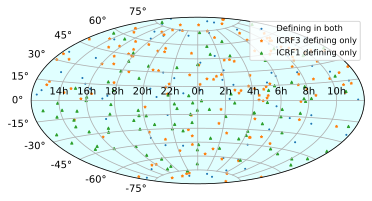

In [31]:
# Transform the coordinate into an astropy.coordinate.SkyCoord object
# A
coord_A = SkyCoord(ra=com_souA["ra_icrf3sx"], dec=com_souA["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_A = coord_A.ra.wrap_at(180 * u.deg).radian
dec_rad_A = coord_A.dec.radian

# B
coord_B = SkyCoord(ra=com_souB["ra_icrf3sx"], dec=com_souB["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_B = coord_B.ra.wrap_at(180 * u.deg).radian
dec_rad_B = coord_B.dec.radian

# C
coord_C = SkyCoord(ra=com_souC["ra_icrf3sx"], dec=com_souC["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_C = coord_C.ra.wrap_at(180 * u.deg).radian
dec_rad_C = coord_C.dec.radian

# D
coord_D = SkyCoord(ra=com_souD["ra_icrf3sx"], dec=com_souD["dec_icrf3sx"])
# The mid-point of skyplot will be 0
ra_rad_D = coord_D.ra.wrap_at(180 * u.deg).radian
dec_rad_D = coord_D.dec.radian


ax = plt.subplot(111, projection="aitoff", facecolor="lightcyan")
# plt.title("Distribution of ", y=1.08)
ax.scatter(ra_rad_A, dec_rad_A, marker=".", s=5, label="Defining in both")
ax.scatter(ra_rad_B, dec_rad_B, marker="*", s=5, label="ICRF3 defining only")
ax.scatter(ra_rad_C, dec_rad_C, marker="^", s=5, label="ICRF1 defining only")
# ax.scatter(ra_rad_D, dec_rad_D, marker="v", s=1, label="D")

pi = np.pi
ax.set_xticks(np.arange(-5./6 * pi, pi, pi/6))
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h",
                     "0h", "2h", "4h", "6h", "8h", "10h"])

ax.legend(fontsize="small", loc="upper right")
ax.grid(True)

Next step is to calculate the positional offset (ICRF1 - ICRF3SX).

In [9]:
[dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov,
 ang_sep, X_a, X_d, X, X2] = pos_diff_calc(
    com_sou["ra_icrf1"], com_sou["ra_err_icrf1"], 
    com_sou["dec_icrf1"], com_sou["dec_err_icrf1"], com_sou["ra_dec_corr_icrf1"],
    com_sou["ra_icrf3sx"], com_sou["ra_err_icrf3sx"], 
    com_sou["dec_icrf3sx"], com_sou["dec_err_icrf3sx"], com_sou["ra_dec_corr_icrf3sx"])

com_sou.add_columns([dRA, dDC, dRA_err, dDC_err, dRA_dDC_cov, ang_sep, X_a, X_d, X, X2],
                    names=["dra", "ddec", "dra_err", "ddec_err", "dra_ddec_cov",
                           "ang_sep", "nor_dra",  "nor_ddec", "nor_sep_cov", "nor_sep"])

com_sou["dra"].unit = u.mas
com_sou["ddec"].unit = u.mas
com_sou["dra_err"].unit = u.mas

com_sou

<Table masked=True length=604>
icrf_name_icrf3sx iers_name ...     nor_sep_cov           nor_sep      
                            ...         deg                 deg        
      str16          str8   ...       float64             float64      
----------------- --------- ... ------------------- -------------------
 J000435.6-473619  0002-478 ...   1.460851189907218  1.4696355614313206
 J000557.1+382015  0003+380 ...  0.9193454459163318  0.9371556029799343
 J000613.8-062335  0003-066 ...  1.8938616483998083  1.4933213503548635
 J001031.0+105829  0007+106 ...  0.5026921979253374  0.5665482333437921
 J001033.9+172418  0007+171 ...  0.2093448096426579  0.2448334664871616
 J001101.2-261233  0008-264 ...   1.039817769882776  0.8011739277738092
 J001052.5-415310  0008-421 ...  3.2437077463672765  3.4074752501118923
 J001331.1+405137  0010+405 ...  0.5598793421494791  0.5667470593332399
 J001611.0-001512  0013-005 ...  0.5097571392167355 0.29715988605496535
              ...       ... ...                 ...                 ...
 J234029.0+264156  2337+264 ...  0.3314603706627368   0.331460322361075
 J234636.8+093045  2344+092 ...   1.049025213823631  0.8995492881779265
 J234802.6-163112  2345-167 ... 0.20432837524889302 0.20432588204481547
 J235421.6+455304  2351+456 ...  0.5315292773986077  0.5315308412775651
 J235430.1-151311  2351-154 ...  0.2197086204234369 0.14492158648704043
 J235509.4+495008  2352+495 ...  0.2618624970782462 0.26183954676508114
 J235600.6-682003  2353-686 ...  0.8397627636500762  0.8357982698058591
 J235810.8-102008  2355-106 ...   1.138847468681842  1.0194512381206922
 J235753.2-531113  2355-534 ...  1.8127397670543528  1.8473502503569506
 J235933.1+385042  2356+385 ... 0.35867577352121927 0.30399162364040927

In [10]:
# Seperate the sources into the "defining sources" and "other sources".
# Defining sources
mask_def = (com_sou["type_icrf3sx"] == "D")
com_def = com_sou[mask_def]

# Other sources
mask_oth = (com_sou["type_icrf3sx"] != "D")
com_oth = com_sou[mask_oth]

Several plots related to the positional difference.

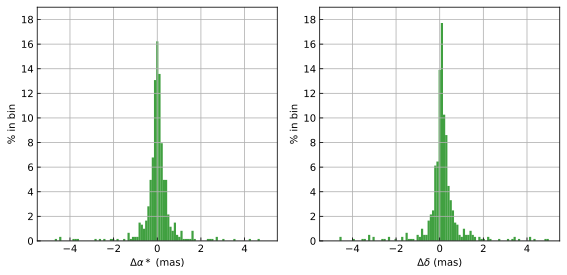

In [11]:
# Difference in RA and decl.
bins_array = np.linspace(-5, 5, 100)
weights = np.ones_like(dRA) * 100. / dRA.size

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(dRA, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(dDC, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_yticks(np.arange(0, 20, 2))
ax1.set_yticks(np.arange(0, 20, 2))

ax0.set_ylim([0, 19])
ax1.set_ylim([0, 19])

ax0.set_xlabel("$\Delta\\alpha*$ (mas)")
ax1.set_xlabel("$\Delta\\delta$ (mas)")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

ax0.grid()
ax1.grid()

fig.tight_layout()
plt.show()

In [12]:
std_ra = np.std(X_a)
std_dec = np.std(X_d)

std_ra, std_dec

(2.509029700488768, 1.2939225802053482)

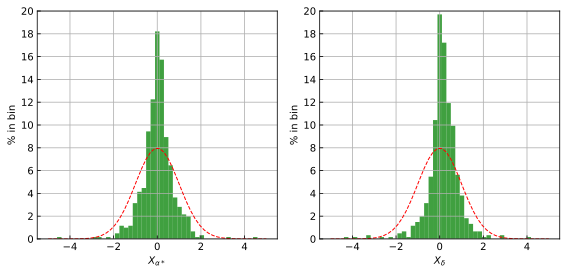

In [13]:
# Normalized difference in RA and decl.
from scipy import stats
bins_array = np.linspace(-5, 5, 50)
weights = np.ones_like(dRA) * 100. / dRA.size

# Plot the 
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(X_a, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(X_d, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_xlabel("$X_{\\alpha*}$")
ax1.set_xlabel("$X_{\\delta}$")

ax0.set_ylim([0, 20])
ax1.set_ylim([0, 20])

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 21, 2))
ax1.set_yticks(np.arange(0, 21, 2))

fig.tight_layout()

ax0.grid()
ax1.grid()

# plt.show()

plt.savefig("../plots/icrf3_sx_icrf1_nor_off.png")

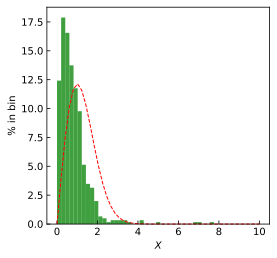

In [14]:
# Distribution of normalized separation
from scipy import stats

bins_array = np.linspace(0, 10, 50)
weights = np.ones_like(X) * 100. / X.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(X, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$X$")
ax.set_ylabel("% in bin")

plt.show()

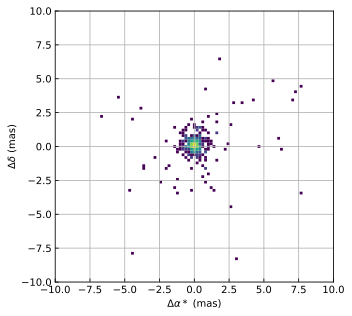

In [15]:
from matplotlib import colors

fig, ax = plt.subplots(figsize=(5, 5))

bins = np.linspace(-10, 10, 100)

# We can increase the number of bins on each axis
ax.hist2d(dRA, dDC, bins, norm=colors.LogNorm())

ax.set_xlabel("$\Delta\\alpha*$ (mas)")
ax.set_ylabel("$\Delta\\delta$ (mas)")

ax.grid(True)

plt.show()

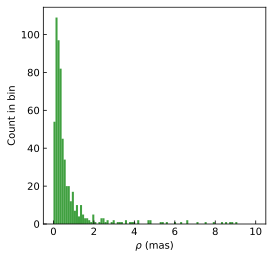

In [16]:
# Distribution of angular separation
bins_array = np.linspace(0, 10, 100)

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(ang_sep, bins_array, facecolor="g", alpha=0.75)

ax.set_xlabel("$\\rho$ (mas)")
ax.set_ylabel("Count in bin")

plt.show()

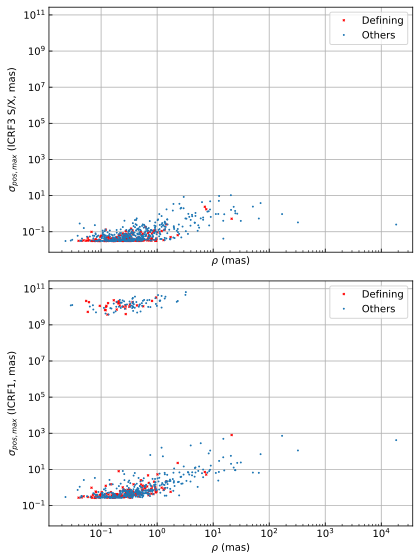

In [17]:
# Angular position difference vs. positional uncertainty
fig, (ax0, ax1) = plt.subplots(figsize=(6, 8), nrows=2, sharex=True, sharey=True)

ax0.plot(com_def["ang_sep"],
         com_def["pos_err_icrf3sx"], "rx", ms=2, label="Defining")
ax1.plot(com_def["ang_sep"],
         com_def["pos_err_icrf1"], "rx", ms=2, label="Defining")

ax0.plot(com_oth["ang_sep"],
         com_oth["pos_err_icrf3sx"], ".", ms=2, label="Others")
ax1.plot(com_oth["ang_sep"], com_oth["pos_err_icrf1"],
         ".", ms=2, label="Others")

ax0.set_xscale("log")
ax0.set_yscale("log")
ax1.set_xscale("log")
ax1.set_yscale("log")


ax0.set_xlabel("$\\rho$ (mas)")
ax0.set_ylabel("$\sigma_{pos,max}$ (ICRF3 S/X, mas)")
ax1.set_xlabel("$\\rho$ (mas)")
ax1.set_ylabel("$\sigma_{pos,max}$ (ICRF1, mas)")


ax0.legend()
ax1.legend()

ax0.grid()
ax1.grid()

fig.tight_layout()
plt.show()

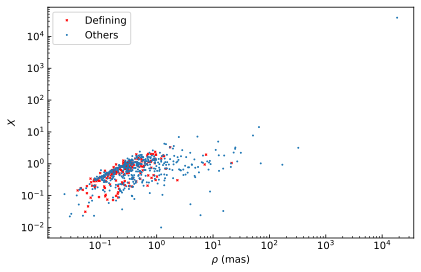

In [18]:
# Angular separation vs. normalized separation
fig, ax = plt.subplots()

ax.plot(com_def["ang_sep"],
         com_def["nor_sep_cov"], "rx", ms=2, label="Defining")
ax.plot(com_oth["ang_sep"],
         com_oth["nor_sep_cov"], ".", ms=2, label="Others")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("$\\rho$ (mas)")
ax.set_ylabel("$X$")

ax.legend()

fig.tight_layout()
plt.show()

Then I investigate the systematics through the 16-parameters transformation.

In [19]:
# Try with all the sources
# Transform columns into np.array
dra = np.array(com_sou["dra"])
ddec = np.array(com_sou["ddec"])
dra_err = np.array(com_sou["dra_err"])
ddec_err = np.array(com_sou["ddec_err"])
ra_rad = np.array(com_sou["ra_icrf3sx"].to(u.radian))
dec_rad = np.array(com_sou["dec_icrf3sx"].to(u.radian))
dra_ddec_cov = np.array(com_sou["dra_ddec_cov"])

# Transformation parameters
# l_max = 1
w1_all, sig1_all, corrcoef1_all, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_all, sig2_all, corrcoef2_all, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_all * 1.e3
sig1 = sig1_all * 1.e3
w2 = w2_all * 1.e3
sig2 = sig2_all * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_all, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_all, deci_digit=1, included_one=False)

# apriori statistics (weighted)
#         mean for RA:    -28.971 
#         wrms for RA:    703.685 
#          std for RA:    702.505 
#        mean for Dec:    -10.839 
#        wrms for Dec:    263.173 
#         std for Dec:    262.731 

# apriori reduced Chi-square for: 1240588.643
# posteriori statistics  of vsh01 fit (weighted)
#         mean for RA:     -1.419 
#          rms for RA:    702.945 
#          std for RA:    702.361 
#        mean for Dec:    -58.542 
#         rms for Dec:    289.247 
#         std for Dec:    283.016 

# posteriori reduced Chi-square for: 1206188.543
# goodness-of-fit is      0.000
# apriori statistics (weighted)
#         mean for RA:    -28.971 
#         wrms for RA:    703.685 
#          std for RA:    702.505 
#        mean for Dec:    -10.839 
#        wrms for Dec:    263.173 
#         std for Dec:    262.731 

# apriori reduced Chi-square for: 1240588.643
# posteriori statistics of vsh02 fit (weighted)
#         mean for RA:     21.515

In [20]:
# Remove the outlier (consider the normalized separation)
N = len(com_sou)
X0 = np.sqrt(np.log(N) * 2)
# X0 = 3.41

print("There are %d sources.\n"
      "When X >= %.2f, the number of the outlier is smaller than 1." % (N, X0))

mask = ((com_sou["nor_sep_cov"] <= X0)
        & (com_sou["ang_sep"] < 10)
        & (com_sou["pos_err_icrf3sx"] < 10)
        & (com_sou["pos_err_icrf1"] < 10))

# Table of a clean sample
com_clean = com_sou[mask]

print("After elimination, there are %d sources in the clean sample." % len(com_clean))

There are 604 sources.
When X >= 3.58, the number of the outlier is smaller than 1.
After elimination, there are 463 sources in the clean sample.


In [21]:
# Transform columns into np.array
dra = np.array(com_clean["dra"])
ddec = np.array(com_clean["ddec"])
dra_err = np.array(com_clean["dra_err"])
ddec_err = np.array(com_clean["ddec_err"])
ra_rad = np.array(com_clean["ra_icrf3sx"].to(u.radian))
dec_rad = np.array(com_clean["dec_icrf3sx"].to(u.radian))
dra_ddec_cov = np.array(com_clean["dra_ddec_cov"])

In [22]:
# Transformation parameters
# l_max = 1
w1_cln, sig1_cln, corrcoef1_cln, _, _, _ = vsh_deg01_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# l_max = 2
w2_cln, sig2_cln, corrcoef2_cln, _, _, _ = vsh_deg02_fitting(
    dra, ddec, ra_rad, dec_rad, dra_err, ddec_err,
    cov=dra_ddec_cov, elim_flag="None")

# mas -> uas
w1 = w1_cln * 1.e3
sig1 = sig1_cln * 1.e3
w2 = w2_cln * 1.e3
sig2 = sig2_cln * 1.e3

# Print results
print("Estimates (%6d sources)\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "               Rotation [uas]                 "
      "                  Glide [uas]               \n"
      "               x             y             z"
      "               x             y             z\n"
      "----------------------------------------------"
      "----------------------------------------------\n"
      "l_max=1  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "l_max=2  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  "
      "  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f  %+4.0f +/- %3.0f\n"
      "----------------------------------------------"
      "----------------------------------------------\n" %
      (dra.size, w1[3], sig1[3], w1[4], sig1[4], w1[5], sig1[5],
       w1[0], sig1[0], w1[1], sig1[1], w1[2], sig1[2],
       w2[3], sig2[3], w2[4], sig2[4], w2[5], sig2[5],
       w2[0], sig2[0], w2[1], sig2[1], w2[2], sig2[2]))

quad_names = Column(["ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_quad = Table([quad_names, w2[6:], sig2[6:]], names=["Quadrupolar term", "Estimate", "Error"])
t_quad["Estimate"].format = "%5.0f"
t_quad["Error"].format = "%5.0f"
print(t_quad)

print("Correlation coefficient between parameters in 'l_max=1' fit")
print_vsh1_corr(corrcoef1_cln, deci_digit=1, included_one=False)

print("Correlation coefficient between parameters in 'l_max=2' fit")
print_vsh2_corr(corrcoef2_cln, deci_digit=1, included_one=False)

# apriori statistics (weighted)
#         mean for RA:      0.069 
#         wrms for RA:      1.039 
#          std for RA:      1.036 
#        mean for Dec:      0.156 
#        wrms for Dec:      0.846 
#         std for Dec:      0.831 

# apriori reduced Chi-square for:      0.495
# posteriori statistics  of vsh01 fit (weighted)
#         mean for RA:      0.051 
#          rms for RA:      1.034 
#          std for RA:      1.031 
#        mean for Dec:      0.058 
#         rms for Dec:      0.832 
#         std for Dec:      0.829 

# posteriori reduced Chi-square for:      0.425
# goodness-of-fit is      1.000
# apriori statistics (weighted)
#         mean for RA:      0.069 
#         wrms for RA:      1.039 
#          std for RA:      1.036 
#        mean for Dec:      0.156 
#        wrms for Dec:      0.846 
#         std for Dec:      0.831 

# apriori reduced Chi-square for:      0.495
# posteriori statistics of vsh02 fit (weighted)
#         mean for RA:      0.057 
#

Then I check the residuals of positional offsets.

In [23]:
# Remove the systematics
RA = np.array(com_sou["ra_icrf3sx"].to(u.radian))
DE = np.array(com_sou["dec_icrf3sx"].to(u.radian))

# dra_ns, ddec_ns = residual_calc02(dRA, dDC, RA, DE, w2_cln)
dra_ns, ddec_ns = residual_calc02(dRA, dDC, RA, DE, w2_all)

# Now re-calculate the normalized difference
ang_sep_ns, Xa_ns, Xd_ns, X_ns, _ = nor_sep(
    dra_ns, dRA_err, ddec_ns, dDC_err, dRA_dDC_cov/dRA_err/dDC_err)

In [24]:
# Difference in RA and decl.
bins_array = np.linspace(-100, 100, 20)
weights = np.ones_like(dra_ns) * 100. / dra_ns.size

fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(dra_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(ddec_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

# ax0.set_yticks(np.arange(0, 10, 2))
# ax1.set_yticks(np.arange(0, 10, 2))

# ax0.set_ylim([0, 20])
# ax1.set_ylim([0, 20])

ax0.set_xlabel("$\Delta\\alpha*$ (mas)")
ax1.set_xlabel("$\Delta\\delta$ (mas)")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

fig.tight_layout()
plt.show()

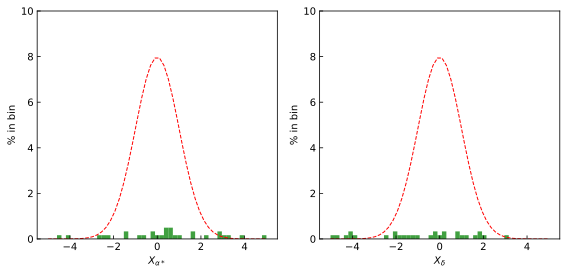

In [25]:
# Normalized difference in RA and decl.
from scipy import stats
bins_array = np.linspace(-5, 5, 50)
weights = np.ones_like(Xa_ns) * 100. / Xa_ns.size

# Plot the 
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)
ax0.hist(Xa_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)
ax1.hist(Xd_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

ax0.set_xlabel("$X_{\\alpha*}$")
ax1.set_xlabel("$X_{\\delta}$")

ax0.set_ylabel("% in bin")
ax1.set_ylabel("% in bin")

# add a '(standard) Gaussian distribution' line
Gaussian_dist = stats.norm.pdf(bins_array, 0, 1) * 10. / 50
ax0.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)
ax1.plot(bins_array, Gaussian_dist * 100, "r--", linewidth=1)

ax0.set_yticks(np.arange(0, 11, 2))
ax1.set_yticks(np.arange(0, 11, 2))

fig.tight_layout()
plt.show()

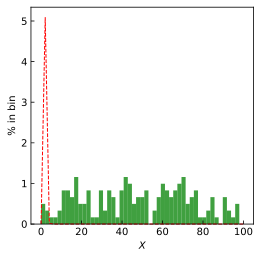

In [26]:
# Distribution of normalized separation
from scipy import stats

bins_array = np.linspace(0, 100, 50)
weights = np.ones_like(X_ns) * 100. / X_ns.size

fig, ax = plt.subplots(figsize=(4, 4))
ax.hist(X_ns, bins_array, weights=weights, facecolor="g", alpha=0.75)

# add a '(standard) Rayleigh distribution' line
rayleigh_dist = stats.rayleigh.pdf(bins_array) * 10. / 50  * 100
ax.plot(bins_array, rayleigh_dist, "r--", linewidth=1)

ax.set_xlabel("$X$")
ax.set_ylabel("% in bin")

plt.show()

The last step is to save the 16 transformation parameters for further use.

In [27]:
vsh2_names = Column(["D1", "D2", "D3",
                     "R1", "R2", "R3",
                     "ER22", "EI22", "ER21", "EI21", "E20",
                     "MR22", "MI22", "MR21", "MI21", "M20"])
t_vsh2 = Table([vsh2_names, w2, sig2], names=[
               "Names", "Estimate", "Error"])
t_vsh2["Estimate"].format = "%5.0f"
t_vsh2["Error"].format = "%5.0f"
t_vsh2["Estimate"].unit = u.uas
t_vsh2["Error"].unit = u.uas
t_vsh2.write("../logs/icrf3sx_icrf1_vsh02.log", format="ascii", overwrite=True)